In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pokemon = pd.read_csv(
    "E:/Studia/Magisterskie/Semestr I/Introduction for Python/introduction-to-python/05 Data Visualization/datasets_121_280_Pokemon.csv",
    index_col="#",
)
pokemon.sample(5)

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
131,Lapras,Water,Ice,535,130,85,80,85,95,60,1,False
43,Oddish,Grass,Poison,320,45,50,55,75,65,30,1,False
44,Gloom,Grass,Poison,395,60,65,70,85,75,40,1,False
263,Zigzagoon,Normal,NaN,240,38,30,41,30,41,60,3,False
302,Sableye,Dark,Ghost,380,50,75,75,65,65,50,3,False


In [3]:
sns.set()

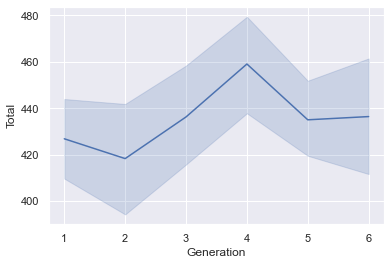

In [4]:
sns.lineplot(
    x="Generation",
    y="Total",
    data=pokemon
)

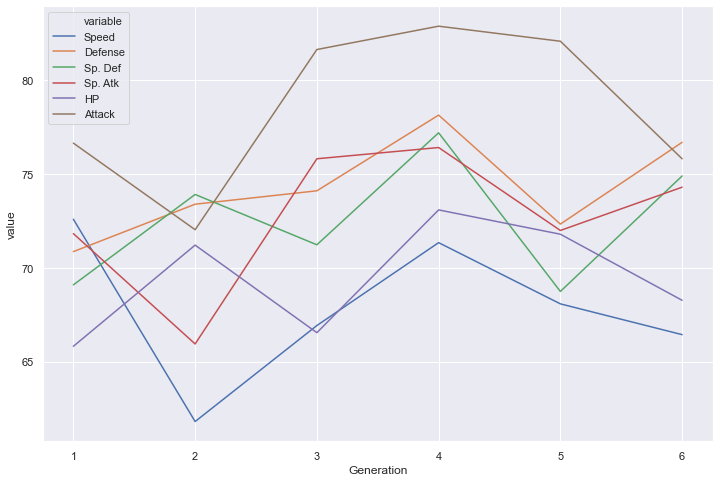

In [5]:
generation_values = pd.melt(
    pokemon,
    id_vars=["Generation"],
    value_vars=["Speed", "Defense", "Sp. Def", "Sp. Atk", "HP", "Attack"],
)

fig, ax = plt.subplots()
sns.lineplot(
    x="Generation",
    y="value",
    hue="variable",
    ci=None,
    data=generation_values,
)
fig.set_size_inches(12, 8)


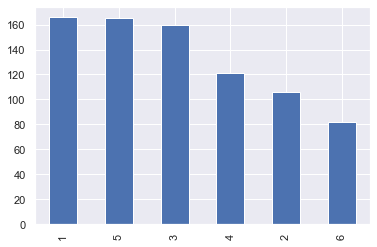

In [6]:
pokemon["Generation"].value_counts().plot.bar()

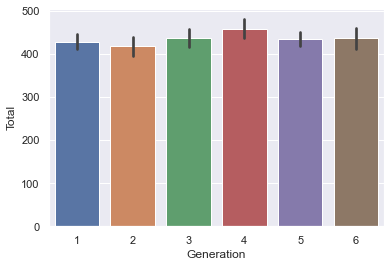

In [7]:
sns.barplot(
    x="Generation",
    y="Total",
    data=pokemon,
)

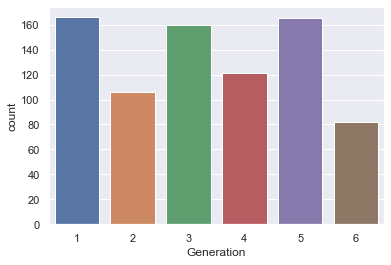

In [8]:
sns.countplot(
    "Generation",
    data=pokemon,
)

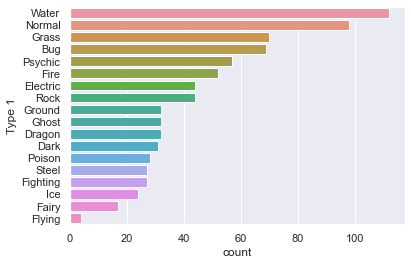

In [9]:
sns.countplot(
    y="Type 1",
    order=pokemon["Type 1"].value_counts().index,
    data=pokemon
)

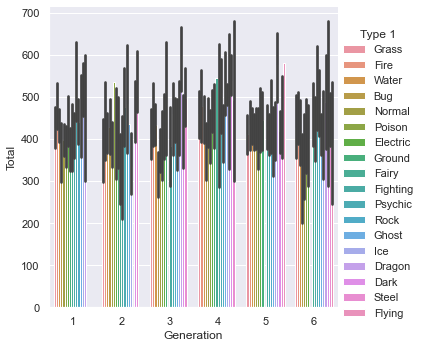

In [20]:
sns.catplot(
    x="Generation",
    y="Total",
    hue="Type 1",
    kind="bar",
    data=pokemon
)

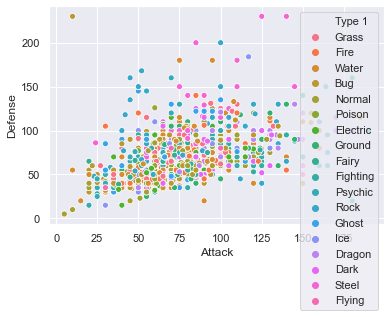

In [18]:
sns.scatterplot(
    x="Attack",
    y="Defense",
    hue="Type 1",
    data=pokemon
)

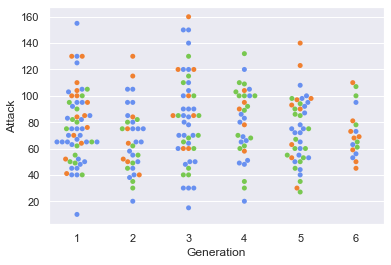

In [25]:
starter_types=["Water","Fire","Grass"]
palette = {
    "Water":"#6890F0",
    "Fire":"#F08030",
    "Grass":"#78C850"
}

g = sns.swarmplot(
    x="Generation",
    y="Attack",
    hue="Type 1",
    palette=palette,
    data=pokemon[pokemon["Type 1"].isin(starter_types)]
)
g.legend_.remove()

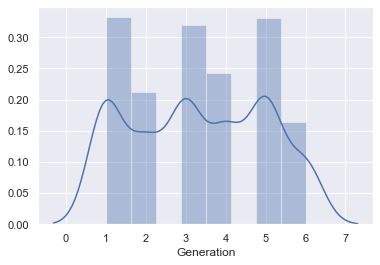

In [27]:
sns.distplot(pokemon["Generation"])

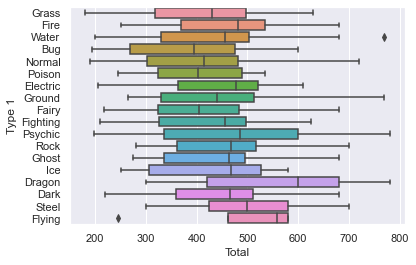

In [34]:
sns.boxplot(
    x="Total",
    y="Type 1",
    data=pokemon)

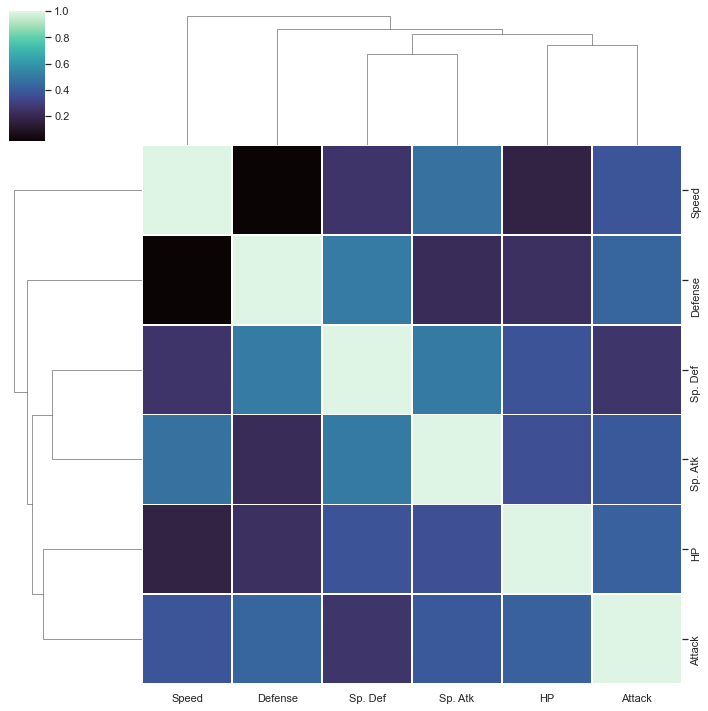

In [36]:
stats = ["Speed", "Defense", "Sp. Def", "Sp. Atk", "HP", "Attack"]

sns.clustermap(
    pokemon[stats].corr(),
    cmap="mako",
    linewidths=.75
)

In [49]:
avocado = pd.read_csv(
    "avocado.csv",
    index_col=0
)
avocado.sample(5)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
14,2016-09-18,1.59,35004.70,5284.83,5003.17,259.37,24457.33,8769.31,15688.02,0.0,organic,2016,Seattle
48,2015-01-25,1.34,27146.81,17038.27,9879.87,0.00,228.67,228.67,0.00,0.0,organic,2015,SanFrancisco
16,2017-09-10,2.19,8032.49,258.82,1879.95,0.00,5893.72,3563.69,2330.03,0.0,organic,2017,Roanoke
32,2017-05-21,2.07,5056.03,1260.80,146.98,8.72,3639.53,3252.01,387.52,0.0,organic,2017,Jacksonville
39,2016-03-27,2.07,7588.03,1210.19,6043.13,0.00,334.71,331.38,3.33,0.0,organic,2016,Sacramento


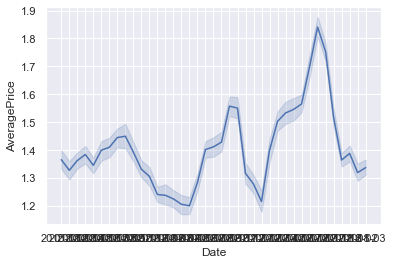

In [53]:
#Create a line plot showing the average price of avocado over months
temp = avocado.Date.map(lambda d: d[:7])
sns.lineplot(
    x = temp,
    y="AveragePrice",
    data = avocado
)

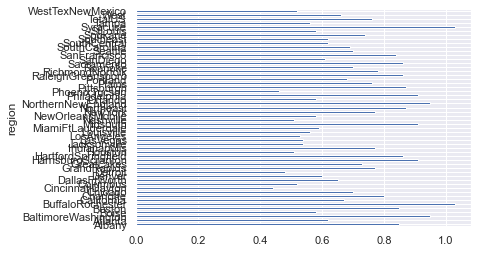

In [95]:
#Create a horizontal bar plot showing 10 highest mean prices depending on region
avocado.groupby('region').AveragePrice.min().plot.barh()


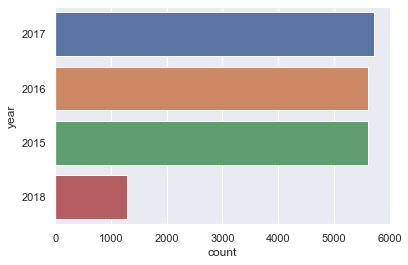

In [98]:
#Create a count plot for the year of the avocado
sns.countplot(
    y="year",
    order = avocado["year"].value_counts().index,
    data=avocado
)

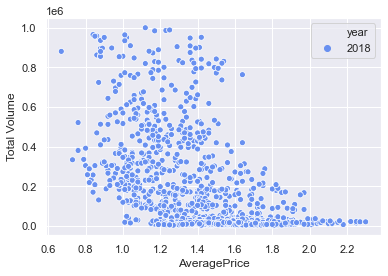

In [142]:
#Create a scatter plot of average price vs Total Volume for year 2018, 
#when the Total Volume is lower than 1e6

temp = avocado.loc[:,['year','AveragePrice','Total Volume']]
temp = temp.loc[temp.year.isin([2018])]
temp = temp.loc[temp['Total Volume'] < 1e6]

sns.scatterplot(
    x="AveragePrice",
    y="Total Volume",
    hue = "year",
    palette = {
        2018: "#6890F0"
    },
    data = temp
)

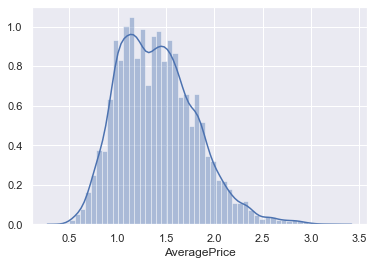

In [143]:
#Show the AveragePrice distribution.
sns.distplot(avocado.AveragePrice)

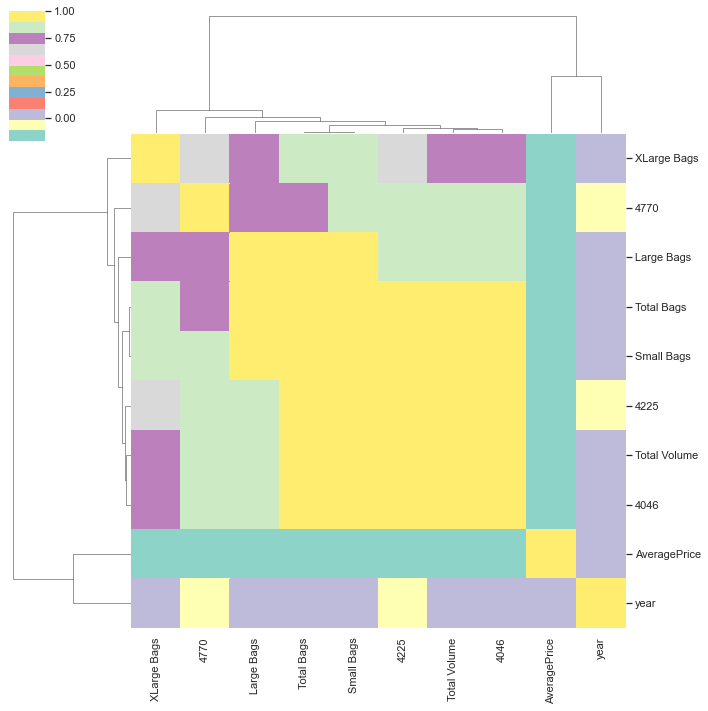

In [147]:
#Create a clustermap of avocado correlations.

sns.clustermap(
    avocado.corr(),
    cmap = "Set3"
)

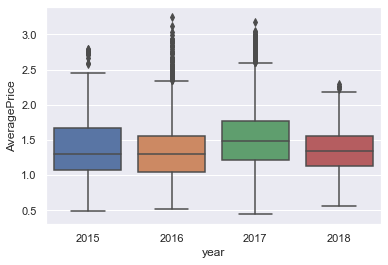

In [150]:
#Show a boxplot of average price per year.

sns.boxplot(
    x = "year",
    y = "AveragePrice",
    data=avocado
)